# Sentiment Analysis

# Random Forest - 5% of the Data

In [283]:
# Open Home Full to try Random Forest with 5% of the Home and Kitchen Dataset

In [33]:
# using Bag of words

import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [24]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('tagsets')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/juliamarques/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/juliamarques/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/juliamarques/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package tagsets to
[nltk_data]     /Users/juliamarques/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

In [2]:
#reading the file "Home 5%" 

import pandas as pd 
data = pd.read_csv('home_sample0.05.csv')
data

,overall,verified,asin,reviewText,summary
0,5,True,B005I63VOS,works perfectly and I always have a spare when...,Five Stars
1,5,True,B00FS3MLVK,I got this for my mom and I tested it out on p...,It works pretty good so far
2,5,True,B00KOQ560E,big enough to use as a cereal bowl,Five Stars
3,5,True,B00R3Z4CWC,"Decent weight, plenty sharp, affordable. Sure...",they are not super gourmet but for cheap steak...
4,4,True,B0043KXCS0,When you don't have a table to put your quilti...,"Love this - 60"" Folding Table"
...,...,...,...,...,...
344753,5,True,B00WAASE2O,Love it,Five Stars
344754,2,False,B0015S7OLO,"Great for broiling, baking, and, uh, um... Oka...",Not holding my breath for the recall announcem...
344755,4,True,B00FE4QT9I,"I don't like microfiber sheets as a rule, but ...",Granddaughter loves these!
344756,5,True,B00UYX0RMO,I love it. Had one for my son 35 years ago wh...,Great idea.


In [3]:
df = data.drop(columns=['summary'], axis = 1)
df

,overall,verified,asin,reviewText
0,5,True,B005I63VOS,works perfectly and I always have a spare when...
1,5,True,B00FS3MLVK,I got this for my mom and I tested it out on p...
2,5,True,B00KOQ560E,big enough to use as a cereal bowl
3,5,True,B00R3Z4CWC,"Decent weight, plenty sharp, affordable. Sure..."
4,4,True,B0043KXCS0,When you don't have a table to put your quilti...
...,...,...,...,...
344753,5,True,B00WAASE2O,Love it
344754,2,False,B0015S7OLO,"Great for broiling, baking, and, uh, um... Oka..."
344755,4,True,B00FE4QT9I,"I don't like microfiber sheets as a rule, but ..."
344756,5,True,B00UYX0RMO,I love it. Had one for my son 35 years ago wh...


In [4]:
#percentage per score

df["overall"].value_counts(normalize=True) 

5    0.681324
4    0.148611
3    0.074226
1    0.053652
2    0.042186
Name: overall, dtype: float64

In [5]:
#number of reviews per score

df["overall"].value_counts()

5    234892
4     51235
3     25590
1     18497
2     14544
Name: overall, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
df

,overall,verified,asin,reviewText
0,5,True,B005I63VOS,works perfectly and I always have a spare when...
1,5,True,B00FS3MLVK,I got this for my mom and I tested it out on p...
2,5,True,B00KOQ560E,big enough to use as a cereal bowl
3,5,True,B00R3Z4CWC,"Decent weight, plenty sharp, affordable. Sure..."
4,4,True,B0043KXCS0,When you don't have a table to put your quilti...
...,...,...,...,...
344753,5,True,B00WAASE2O,Love it
344754,2,False,B0015S7OLO,"Great for broiling, baking, and, uh, um... Oka..."
344755,4,True,B00FE4QT9I,"I don't like microfiber sheets as a rule, but ..."
344756,5,True,B00UYX0RMO,I love it. Had one for my son 35 years ago wh...


In [8]:
#number of rows, number of columns

df.shape

(344758, 4)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344758 entries, 0 to 344757
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   overall     344758 non-null  int64 
 1   verified    344758 non-null  bool  
 2   asin        344758 non-null  object
 3   reviewText  344758 non-null  object
dtypes: bool(1), int64(1), object(2)
memory usage: 8.2+ MB


In [10]:
#filtering reviews

df['verified'].unique()

array([ True, False])

In [11]:
#verified reviews = 6.294.392 rows (before = 6.895.163)

verif_df = df[df['verified'] == True]
verif_df 

,overall,verified,asin,reviewText
0,5,True,B005I63VOS,works perfectly and I always have a spare when...
1,5,True,B00FS3MLVK,I got this for my mom and I tested it out on p...
2,5,True,B00KOQ560E,big enough to use as a cereal bowl
3,5,True,B00R3Z4CWC,"Decent weight, plenty sharp, affordable. Sure..."
4,4,True,B0043KXCS0,When you don't have a table to put your quilti...
...,...,...,...,...
344752,5,True,B001AO2PXK,I'm so glad I picked a slow cooker that automa...
344753,5,True,B00WAASE2O,Love it
344755,4,True,B00FE4QT9I,"I don't like microfiber sheets as a rule, but ..."
344756,5,True,B00UYX0RMO,I love it. Had one for my son 35 years ago wh...


In [12]:
#percentage per score (verified)

verif_df ["overall"].value_counts(normalize=True) 

5    0.687935
4    0.145992
3    0.074009
1    0.050835
2    0.041229
Name: overall, dtype: float64

In [13]:
#count of reviews per score (verified)

verif_df ["overall"].value_counts() 

5    216348
4     45913
3     23275
1     15987
2     12966
Name: overall, dtype: int64

In [14]:
verif_df["reviewText"].iloc[0] #Here is where NLP begins #now I need to analyse the sentences

"works perfectly and I always have a spare when I'm cleaning one"

In [15]:
verif_df['length'] = list(map(lambda x: len(str(x).split()), verif_df['reviewText'])) #length = number of words

/var/folders/y0/yj8c7cqs19v6_dxrxj76yrbh0000gn/T/ipykernel_36142/124959987.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verif_df['length'] = list(map(lambda x: len(str(x).split()), verif_df['reviewText'])) #length = number of words


In [16]:
#Now I have added the length = number of words per review

verif_df

,overall,verified,asin,reviewText,length
0,5,True,B005I63VOS,works perfectly and I always have a spare when...,12
1,5,True,B00FS3MLVK,I got this for my mom and I tested it out on p...,27
2,5,True,B00KOQ560E,big enough to use as a cereal bowl,8
3,5,True,B00R3Z4CWC,"Decent weight, plenty sharp, affordable. Sure...",29
4,4,True,B0043KXCS0,When you don't have a table to put your quilti...,128
...,...,...,...,...,...
344752,5,True,B001AO2PXK,I'm so glad I picked a slow cooker that automa...,77
344753,5,True,B00WAASE2O,Love it,2
344755,4,True,B00FE4QT9I,"I don't like microfiber sheets as a rule, but ...",35
344756,5,True,B00UYX0RMO,I love it. Had one for my son 35 years ago wh...,129


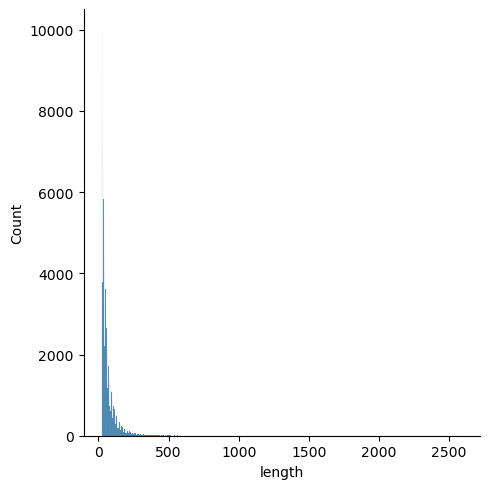

In [34]:
sns.displot(x=verif_df['length'])

In [18]:
verif_df['length'].describe()

count    314489.000000
mean         38.308742
std          56.247486
min           1.000000
25%           9.000000
50%          22.000000
75%          46.000000
max        2591.000000
Name: length, dtype: float64

In [19]:
m = verif_df['length'].median()
m

22.0

In [20]:
#Now I only have the reviews with more than 22 words (3.096.886 reviews)

verif_df = verif_df[verif_df['length'] > m] 
verif_df.shape

(154723, 5)

In [21]:
verif_df.head()

,overall,verified,asin,reviewText,length
1,5,True,B00FS3MLVK,I got this for my mom and I tested it out on p...,27
3,5,True,B00R3Z4CWC,"Decent weight, plenty sharp, affordable. Sure...",29
4,4,True,B0043KXCS0,When you don't have a table to put your quilti...,128
6,4,True,B008FKKGKG,"Light weight, air dies quickly and washes up b...",44
10,5,True,B004MT79EK,I've been needing a drawer organizer for a whi...,38


In [22]:
#Now my dataframe has 154.723 rows

verif_df

,overall,verified,asin,reviewText,length
1,5,True,B00FS3MLVK,I got this for my mom and I tested it out on p...,27
3,5,True,B00R3Z4CWC,"Decent weight, plenty sharp, affordable. Sure...",29
4,4,True,B0043KXCS0,When you don't have a table to put your quilti...,128
6,4,True,B008FKKGKG,"Light weight, air dies quickly and washes up b...",44
10,5,True,B004MT79EK,I've been needing a drawer organizer for a whi...,38
...,...,...,...,...,...
344749,5,True,B005EGY42K,This Eco vessel is the BEST. It keeps drinks r...,53
344752,5,True,B001AO2PXK,I'm so glad I picked a slow cooker that automa...,77
344755,4,True,B00FE4QT9I,"I don't like microfiber sheets as a rule, but ...",35
344756,5,True,B00UYX0RMO,I love it. Had one for my son 35 years ago wh...,129


In [25]:
#corpus = a collection of sentences (not reviews)

reviews = ['']
corpus=[]                            
for review in verif_df['reviewText']:
    reviews.append(review)
    corpus.append(nltk.sent_tokenize(review))

In [26]:
corpus

[['I got this for my mom and I tested it out on pepper and sea salt and it worked great I like the look and the feel'],
 ['Decent weight, plenty sharp, affordable.',
  'Sure, they are not super gourmet but for cheap steak knives that I would not be ashamed of putting out for guests, these work.'],
 ["When you don't have a table to put your quilting things on or other sewing on it makes it pretty difficult.",
  'GREAT table.',
  'It was a little heavy to get up the stairs but I DID IT.',
  'That was with a VERY unhappy husband standing at the top of the stairs too.',
  'BUT I WANTED this in my office/sewing room!!',
  'It was so easy to get out and just unfold and wha-la it was ready to  use!!',
  'ITS AWESOME and STURDY.',
  'Everything gets put on there now and I have 2 desks to boot!!',
  'Its BIG and so easy to put my quilting together on.',
  'I put my sewing machine on here and its awesome.',
  "YOU need this 5' table to use.",
  'Its so handy and just awesome.'],
 ['Light weight,

In [28]:
## flatten the list

corpus=[sent for sublist in corpus for sent in sublist]

In [29]:
#number of sentences: 765.933

len(corpus) 

765933

In [31]:
import re

In [35]:
for i in range(len(corpus)):
    corpus[i] = corpus[i].lower()
    corpus[i] = re.sub(r'\W+',' ',corpus[i]) # Replace everything non-alpahnumeric by ' '
    corpus[i] = re.sub(r'\s+',' ',corpus[i]) # Replace one or more whitespaces by  ' '
    corpus[i] = re.sub(r'\d+',' ',corpus[i]) # Replace one or more digits by  ' '
    corpus[i] = re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)'," ", corpus[i]) # Replace e-mails by ' '
    # Replace urls by ''
    corpus[i] = re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', ' ' , corpus[i]) 
    # Replace html tags by ''
    corpus[i] = BeautifulSoup(corpus[i], 'html.parser').get_text().strip()

In [312]:
print(corpus[16])

now i ll be the first to admit it s a cheap priced item but when i unpacked it the side pieces were cracked and chipped on the edges the drawers had the slides already attached but the screws had been stripped


In [36]:
corpus

['i got this for my mom and i tested it out on pepper and sea salt and it worked great i like the look and the feel',
 'decent weight plenty sharp affordable',
 'sure they are not super gourmet but for cheap steak knives that i would not be ashamed of putting out for guests these work',
 'when you don t have a table to put your quilting things on or other sewing on it makes it pretty difficult',
 'great table',
 'it was a little heavy to get up the stairs but i did it',
 'that was with a very unhappy husband standing at the top of the stairs too',
 'but i wanted this in my office sewing room',
 'it was so easy to get out and just unfold and wha la it was ready to use',
 'its awesome and sturdy',
 'everything gets put on there now and i have   desks to boot',
 'its big and so easy to put my quilting together on',
 'i put my sewing machine on here and its awesome',
 'you need this   table to use',
 'its so handy and just awesome',
 'light weight air dies quickly and washes up beautifully

In [37]:
#tokenizing the corpus   #Token = word

wordfreq = {}              
for sentence in corpus:
    words = sentence.split()
    #tokens = nltk.word_tokenize(sentence) # To get the words, it can be also done with sentence.split()
    for word in words:
        if ( word not in wordfreq.keys() ): ## first time appearnce in the sentence
            wordfreq[word] = 1 # We initialize the corresponding counter
        else: ## if the world is already existed in the dictionalry 
            wordfreq[word] += 1 # We increase the corresponding counter

In [38]:
#for the entire dataset... now I need to drop the stop words

wordfreq

{'i': 384898,
 'got': 12701,
 'this': 150315,
 'for': 152154,
 'my': 106744,
 'mom': 1104,
 'and': 307853,
 'tested': 477,
 'it': 327932,
 'out': 35771,
 'on': 86144,
 'pepper': 912,
 'sea': 153,
 'salt': 1400,
 'worked': 5072,
 'great': 44453,
 'like': 42018,
 'the': 520599,
 'look': 12203,
 'feel': 6400,
 'decent': 1713,
 'weight': 4904,
 'plenty': 1396,
 'sharp': 3080,
 'affordable': 609,
 'sure': 8543,
 'they': 66777,
 'are': 65441,
 'not': 76326,
 'super': 5032,
 'gourmet': 102,
 'but': 88319,
 'cheap': 5554,
 'steak': 463,
 'knives': 3288,
 'that': 100709,
 'would': 34976,
 'be': 45246,
 'ashamed': 31,
 'of': 148364,
 'putting': 2584,
 'guests': 875,
 'these': 47875,
 'work': 14462,
 'when': 33017,
 'you': 75740,
 'don': 21465,
 't': 74718,
 'have': 82275,
 'a': 273849,
 'table': 5258,
 'to': 269529,
 'put': 18440,
 'your': 16223,
 'quilting': 62,
 'things': 6218,
 'or': 36039,
 'other': 19337,
 'sewing': 246,
 'makes': 9083,
 'pretty': 9778,
 'difficult': 2826,
 'was': 72231,
 '

In [316]:
#Reducing the corpus now

#There are two approaches for this: 1. drop "stopwords" (articles, prepositions,...etc) 2. use TF-IDF

In [39]:
from nltk.corpus import stopwords
stop_words = list(stopwords.words('english')) 

In [40]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [41]:
for i in range(len(stop_words)):
    stop_words[i] = re.sub(r"\s*'\s*\w*","",stop_words[i])

#stop_words = [word for word in list(np.unique(stop_words)) if len(word) > 1]
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'you',
 'you',
 'you',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'she',
 'her',
 'hers',
 'herself',
 'it',
 'it',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'that',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more'

In [42]:
#Now I will drop the stop words and get how many times appear every non stopword in the whole dataset

corpus = [(wordfreq[key],key) for key in list(wordfreq.keys()) if key not in stop_words]

In [43]:
corpus

[(12701, 'got'),
 (1104, 'mom'),
 (477, 'tested'),
 (912, 'pepper'),
 (153, 'sea'),
 (1400, 'salt'),
 (5072, 'worked'),
 (44453, 'great'),
 (42018, 'like'),
 (12203, 'look'),
 (6400, 'feel'),
 (1713, 'decent'),
 (4904, 'weight'),
 (1396, 'plenty'),
 (3080, 'sharp'),
 (609, 'affordable'),
 (8543, 'sure'),
 (5032, 'super'),
 (102, 'gourmet'),
 (5554, 'cheap'),
 (463, 'steak'),
 (3288, 'knives'),
 (34976, 'would'),
 (31, 'ashamed'),
 (2584, 'putting'),
 (875, 'guests'),
 (14462, 'work'),
 (5258, 'table'),
 (18440, 'put'),
 (62, 'quilting'),
 (6218, 'things'),
 (246, 'sewing'),
 (9083, 'makes'),
 (9778, 'pretty'),
 (2826, 'difficult'),
 (22312, 'little'),
 (7242, 'heavy'),
 (25894, 'get'),
 (441, 'stairs'),
 (149, 'unhappy'),
 (4100, 'husband'),
 (577, 'standing'),
 (12831, 'top'),
 (6936, 'wanted'),
 (1570, 'office'),
 (10869, 'room'),
 (25380, 'easy'),
 (97, 'unfold'),
 (1, 'wha'),
 (122, 'la'),
 (1602, 'ready'),
 (43652, 'use'),
 (3129, 'awesome'),
 (8855, 'sturdy'),
 (4901, 'everything

In [44]:
corpus.sort(reverse = True)

# Here we keep only the 1000 most frequent words but it can be changed to another bigger value

corpus_freq = [(word[1],word[0]) for word in corpus[:1000]] 
corpus_freq = corpus_freq[1:]
corpus_freq

[('great', 44453),
 ('use', 43652),
 ('like', 42018),
 ('well', 35572),
 ('would', 34976),
 ('love', 31045),
 ('good', 29692),
 ('get', 25894),
 ('easy', 25380),
 ('time', 23970),
 ('really', 23862),
 ('bought', 23326),
 ('nice', 23143),
 ('little', 22312),
 ('much', 21375),
 ('product', 20299),
 ('used', 19967),
 ('also', 19138),
 ('put', 18440),
 ('made', 18034),
 ('price', 17593),
 ('quality', 17444),
 ('perfect', 16824),
 ('works', 16731),
 ('make', 16059),
 ('even', 15676),
 ('size', 15617),
 ('water', 15496),
 ('small', 15281),
 ('work', 14462),
 ('set', 14443),
 ('two', 14357),
 ('buy', 13944),
 ('still', 13566),
 ('coffee', 13466),
 ('clean', 13401),
 ('using', 13385),
 ('back', 13254),
 ('looks', 12949),
 ('first', 12905),
 ('better', 12866),
 ('top', 12831),
 ('got', 12701),
 ('enough', 12233),
 ('look', 12203),
 ('recommend', 11829),
 ('need', 11784),
 ('fit', 11685),
 ('could', 11280),
 ('keep', 11252),
 ('way', 11232),
 ('room', 10869),
 ('plastic', 10654),
 ('bit', 10403)

In [45]:
#Steming and lemmatizing

from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')
lem = WordNetLemmatizer()

corpus_freq = [(lem.lemmatize(word[0]),word[1]) for word in corpus_freq]
corpus_freq

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/juliamarques/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


[('great', 44453),
 ('use', 43652),
 ('like', 42018),
 ('well', 35572),
 ('would', 34976),
 ('love', 31045),
 ('good', 29692),
 ('get', 25894),
 ('easy', 25380),
 ('time', 23970),
 ('really', 23862),
 ('bought', 23326),
 ('nice', 23143),
 ('little', 22312),
 ('much', 21375),
 ('product', 20299),
 ('used', 19967),
 ('also', 19138),
 ('put', 18440),
 ('made', 18034),
 ('price', 17593),
 ('quality', 17444),
 ('perfect', 16824),
 ('work', 16731),
 ('make', 16059),
 ('even', 15676),
 ('size', 15617),
 ('water', 15496),
 ('small', 15281),
 ('work', 14462),
 ('set', 14443),
 ('two', 14357),
 ('buy', 13944),
 ('still', 13566),
 ('coffee', 13466),
 ('clean', 13401),
 ('using', 13385),
 ('back', 13254),
 ('look', 12949),
 ('first', 12905),
 ('better', 12866),
 ('top', 12831),
 ('got', 12701),
 ('enough', 12233),
 ('look', 12203),
 ('recommend', 11829),
 ('need', 11784),
 ('fit', 11685),
 ('could', 11280),
 ('keep', 11252),
 ('way', 11232),
 ('room', 10869),
 ('plastic', 10654),
 ('bit', 10403),


In [46]:
cols = {word[0]: [] for word in corpus_freq}
reviews = pd.DataFrame(cols)

reviews

,great,use,like,well,would,love,good,get,easy,time,...,anymore,covered,steamer,cube,closed,main,mix,speed,recipe,dp


In [47]:
corpus_freq

[('great', 44453),
 ('use', 43652),
 ('like', 42018),
 ('well', 35572),
 ('would', 34976),
 ('love', 31045),
 ('good', 29692),
 ('get', 25894),
 ('easy', 25380),
 ('time', 23970),
 ('really', 23862),
 ('bought', 23326),
 ('nice', 23143),
 ('little', 22312),
 ('much', 21375),
 ('product', 20299),
 ('used', 19967),
 ('also', 19138),
 ('put', 18440),
 ('made', 18034),
 ('price', 17593),
 ('quality', 17444),
 ('perfect', 16824),
 ('work', 16731),
 ('make', 16059),
 ('even', 15676),
 ('size', 15617),
 ('water', 15496),
 ('small', 15281),
 ('work', 14462),
 ('set', 14443),
 ('two', 14357),
 ('buy', 13944),
 ('still', 13566),
 ('coffee', 13466),
 ('clean', 13401),
 ('using', 13385),
 ('back', 13254),
 ('look', 12949),
 ('first', 12905),
 ('better', 12866),
 ('top', 12831),
 ('got', 12701),
 ('enough', 12233),
 ('look', 12203),
 ('recommend', 11829),
 ('need', 11784),
 ('fit', 11685),
 ('could', 11280),
 ('keep', 11252),
 ('way', 11232),
 ('room', 10869),
 ('plastic', 10654),
 ('bit', 10403),


In [48]:
#I need it per REVIEW... not per sentence... not for the whole corpus
#now I need to fill this data frame

list(cols.keys()) 

['great',
 'use',
 'like',
 'well',
 'would',
 'love',
 'good',
 'get',
 'easy',
 'time',
 'really',
 'bought',
 'nice',
 'little',
 'much',
 'product',
 'used',
 'also',
 'put',
 'made',
 'price',
 'quality',
 'perfect',
 'work',
 'make',
 'even',
 'size',
 'water',
 'small',
 'set',
 'two',
 'buy',
 'still',
 'coffee',
 'clean',
 'using',
 'back',
 'look',
 'first',
 'better',
 'top',
 'got',
 'enough',
 'recommend',
 'need',
 'fit',
 'could',
 'keep',
 'way',
 'room',
 'plastic',
 'bit',
 'purchased',
 'long',
 'year',
 'right',
 'looking',
 'thing',
 'pretty',
 'color',
 'lot',
 'new',
 'another',
 'happy',
 'want',
 'bed',
 'old',
 'sturdy',
 'kitchen',
 'see',
 'go',
 'without',
 'think',
 'purchase',
 'since',
 'hot',
 'sure',
 'hold',
 'around',
 'easily',
 'find',
 'big',
 'light',
 'every',
 'far',
 'best',
 'pan',
 'large',
 'amazon',
 'last',
 'came',
 'box',
 'side',
 'something',
 'bottom',
 'take',
 'day',
 'ordered',
 'cup',
 'needed',
 'many',
 'though',
 'heavy',
 'li

In [49]:
def review_inpector(sentence, stop_words, words):
    '''
    Function that takes a review and returns a dictionary of word frequencies
    Inputs:
    sentence -> review: string
    stop_words -> list of stop_words
    words -> a list of words to count frequency 
    '''

    import re

    # Decompose the review in words -> tokens
    tokens = nltk.word_tokenize(sentence)
    # Cleanup the tokens
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
        tokens[i] = re.sub(r'\W',' ',tokens[i]) # Replace everything non-alpahnumeric by ' '
        tokens[i] = re.sub(r'\s+','',tokens[i]) # Replace one or more whitespaces by  ' '
        tokens[i] = re.sub(r'\d+','',tokens[i]) # Replace one or more digits by  ' '
        tokens[i] = lem.lemmatize(tokens[i])
        
    # Droping tokens which are "stopwords" or empty
    tokens = [ token for token in tokens if (token not in stop_words and token != '')]

    # Initializing an empty dictionary of word frequencies for the corresponding review
    col_freq = {col:0 for col in words}
    
    # Filling the dictionary with word frequencies in the review
    for token in tokens:
        if token in words:
            col_freq[token] += 1

    return col_freq

In [51]:
my_list = list( map(review_inpector, data['reviewText'], #I need to do this with the original data (review)
                    [stop_words]*data.shape[0], [list(cols.keys())]*data.shape[0] ) )

my_list[:2] #the number words in each review

[{'great': 0,
  'use': 0,
  'like': 0,
  'well': 0,
  'would': 0,
  'love': 0,
  'good': 0,
  'get': 0,
  'easy': 0,
  'time': 0,
  'really': 0,
  'bought': 0,
  'nice': 0,
  'little': 0,
  'much': 0,
  'product': 0,
  'used': 0,
  'also': 0,
  'put': 0,
  'made': 0,
  'price': 0,
  'quality': 0,
  'perfect': 0,
  'work': 1,
  'make': 0,
  'even': 0,
  'size': 0,
  'water': 0,
  'small': 0,
  'set': 0,
  'two': 0,
  'buy': 0,
  'still': 0,
  'coffee': 0,
  'clean': 0,
  'using': 0,
  'back': 0,
  'look': 0,
  'first': 0,
  'better': 0,
  'top': 0,
  'got': 0,
  'enough': 0,
  'recommend': 0,
  'need': 0,
  'fit': 0,
  'could': 0,
  'keep': 0,
  'way': 0,
  'room': 0,
  'plastic': 0,
  'bit': 0,
  'purchased': 0,
  'long': 0,
  'year': 0,
  'right': 0,
  'looking': 0,
  'thing': 0,
  'pretty': 0,
  'color': 0,
  'lot': 0,
  'new': 0,
  'another': 0,
  'happy': 0,
  'want': 0,
  'bed': 0,
  'old': 0,
  'sturdy': 0,
  'kitchen': 0,
  'see': 0,
  'go': 0,
  'without': 0,
  'think': 0,
  'p

In [52]:
len(my_list)

344758

In [53]:
reviews = pd.DataFrame(my_list)

In [54]:
reviews

,great,use,like,well,would,love,good,get,easy,time,...,anymore,covered,steamer,cube,closed,main,mix,speed,recipe,dp
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2,0,0,0,0,0,3,2,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344753,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
344754,1,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
344755,0,0,3,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
344756,0,0,0,0,1,1,1,2,0,1,...,0,0,0,0,0,0,0,0,0,0


In [55]:
reviews['overall'] = data['overall'].reset_index(drop=True)

In [56]:
reviews #df tokanized

,great,use,like,well,would,love,good,get,easy,time,...,anymore,covered,steamer,cube,closed,main,mix,speed,recipe,dp
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2,0,0,0,0,0,3,2,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344753,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
344754,1,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
344755,0,0,3,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
344756,0,0,0,0,1,1,1,2,0,1,...,0,0,0,0,0,0,0,0,0,0


In [57]:
#inspect the number of star rating

reviews['overall'].value_counts()

5    234892
4     51235
3     25590
1     18497
2     14544
Name: overall, dtype: int64

In [58]:
reviews['overall'].unique()

array([5, 4, 1, 3, 2])

In [60]:
reviews['overall'].isna().sum()

0

In [61]:
reviews.dropna(inplace=True)

In [62]:
reviews.shape

(344758, 904)

In [63]:
reviews['overall'] = reviews['overall'].astype(str)

In [64]:
reviews['overall'].value_counts()

5    234892
4     51235
3     25590
1     18497
2     14544
Name: overall, dtype: int64

In [342]:
reviews

,great,use,like,well,would,love,good,get,easy,really,...,mini,mentioned,excited,helpful,remember,wire,coating,somewhat,fix,liner
0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344753,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
344754,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
344755,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
344756,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Inspecting the number of stars

<AxesSubplot:xlabel='overall', ylabel='count'>

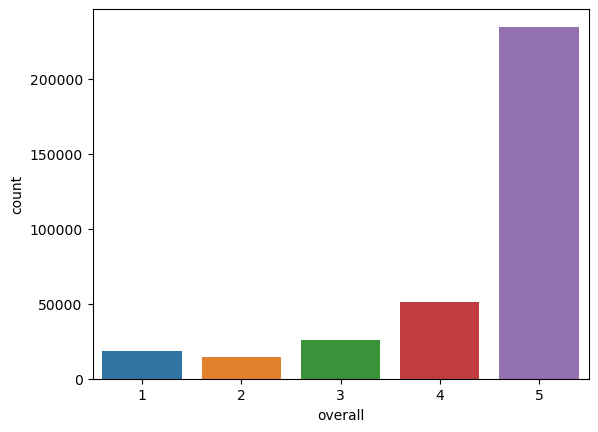

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.countplot(x=reviews['overall'],order = ['1','2','3','4','5'])

## Train test split

In [66]:
#Train test split

X = reviews.drop(columns='overall')
y = reviews['overall']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test  = pd.DataFrame(X_test, columns=X.columns)

y_train = pd.DataFrame(y_train, columns =['overall'])
y_test  = pd.DataFrame(y_test, columns =['overall'])

<AxesSubplot:xlabel='overall', ylabel='count'>

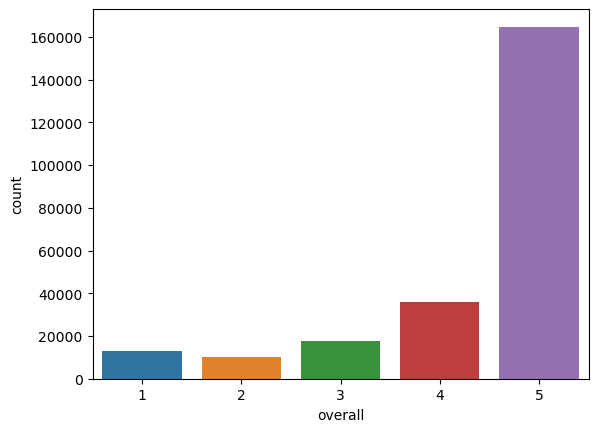

In [68]:
sns.countplot(x=y_train['overall'],order = ['1','2','3','4','5'])

<AxesSubplot:xlabel='overall', ylabel='count'>

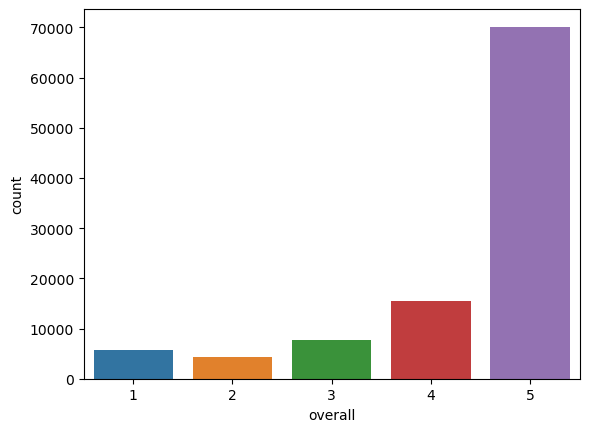

In [69]:
sns.countplot(x=y_test['overall'],order = ['1','2','3','4','5'])

In [70]:
#Class balancing

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

X_train_res = pd.DataFrame(X_train_res, columns= X_train.columns)
y_train_res = pd.DataFrame(y_train_res, columns =['overall'])

<AxesSubplot:xlabel='overall', ylabel='count'>

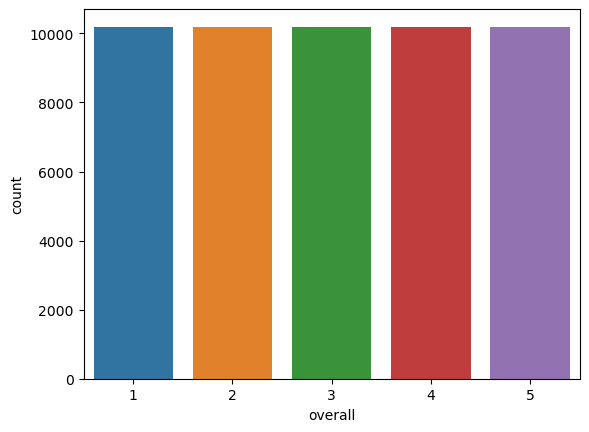

In [71]:
#checking the results

sns.countplot(x=y_train_res['overall'],order = ['1','2','3','4','5'])

In [72]:
y_train_res.value_counts()

overall
1          10193
2          10193
3          10193
4          10193
5          10193
dtype: int64

In [73]:
def bayes(df, rating, review ): # rating = stars, review = X; P(R|X)
    '''
    This function will take a dataframe and it will return the most likely rating for
    a given review according to the Bayes Theorem
    '''
    df2 = df.copy()
    p_rating = len(df2[df2['overall'] == rating]) / len(df2)
    m = ((df2.iloc[:,:-1] == review).apply(sum, axis=1)).tolist()
    t = [index for index, value in enumerate(m)]
    p_review = len(t) / len(df2)
    temp = df2[df2['overall'] == rating]
    m = ((df2[df2['overall'] == rating].iloc[:,:-1] == review).apply(sum, axis=1)).tolist()
    t = [index for index, value in enumerate(m)]
    p_rating_review = len(t) / len(temp)
    p = ( p_rating * p_rating_review ) / p_review
    return round(p,2)

In [74]:
y_train_res.shape
#y_train_res.reshape()

(50965, 1)

In [75]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.ensemble import RandomForestClassifier

nb = CategoricalNB()
rf = RandomForestClassifier()

nb.fit(X_train_res, y_train_res['overall'])
rf.fit(X_train_res, y_train_res['overall'])

RandomForestClassifier()

# Making predictions

In [76]:
y_train_res_pred_rf = rf.predict(X_train_res)
y_test_pred_rf      = rf.predict(X_test)

In [77]:
y_test_pred_rf

array(['2', '5', '2', ..., '2', '4', '1'], dtype=object)

### Model evaluation

In [78]:
def model_performance_class(y_train, y_pred_train, y_test, y_pred_test):

    from sklearn.metrics import cohen_kappa_score, classification_report 


    print("Results obtained for the TRAIN SET")
    print("==================================")
    print("The Cohen's Kappa is: {:.2f}".format(cohen_kappa_score(y_train, y_pred_train)))
    print(classification_report(y_train, y_pred_train))
    print("==================================")
    print("Results obtained for the TEST SET")
    print("The Cohen's Kappa is: {:.2f}".format(cohen_kappa_score(y_test, y_pred_test)))
    print(classification_report(y_test, y_pred_test))

In [362]:
model_performance_class(y_train_res, y_train_res_pred_rf, y_test, y_test_pred_rf)

Results obtained for the TRAIN SET
The Cohen's Kappa is: 0.96
              precision    recall  f1-score   support

           1       0.95      0.98      0.97      9940
           2       0.98      0.96      0.97      9940
           3       0.98      0.96      0.97      9940
           4       0.97      0.95      0.96      9940
           5       0.95      0.97      0.96      9940

    accuracy                           0.96     49700
   macro avg       0.96      0.96      0.96     49700
weighted avg       0.96      0.96      0.96     49700

Results obtained for the TEST SET
The Cohen's Kappa is: 0.27
              precision    recall  f1-score   support

           1       0.31      0.57      0.40      5727
           2       0.14      0.29      0.18      4335
           3       0.21      0.30      0.25      7672
           4       0.27      0.42      0.33     15740
           5       0.88      0.60      0.72     69954

    accuracy                           0.54    103428
   macro

# Proper way

### Road to prediction

In [79]:
myreview = ["This is a horrible restaurant","It could have been better. The waiter spit on my food. I will never go back there. I want to kill someone. Please, do yourself a favor and run from it.", "This was a great experience. I love it here. Super!!!"]

In [80]:
len(myreview)

3

In [81]:
my_list = list( map(review_inpector, myreview, #I need to do this with the original data (review)
                    [stop_words]*X_train_res.shape[0], [list(cols.keys())]*X_train_res.shape[0] ) )

my_list[:2] #the number words in each review

[{'great': 0,
  'use': 0,
  'like': 0,
  'well': 0,
  'would': 0,
  'love': 0,
  'good': 0,
  'get': 0,
  'easy': 0,
  'time': 0,
  'really': 0,
  'bought': 0,
  'nice': 0,
  'little': 0,
  'much': 0,
  'product': 0,
  'used': 0,
  'also': 0,
  'put': 0,
  'made': 0,
  'price': 0,
  'quality': 0,
  'perfect': 0,
  'work': 0,
  'make': 0,
  'even': 0,
  'size': 0,
  'water': 0,
  'small': 0,
  'set': 0,
  'two': 0,
  'buy': 0,
  'still': 0,
  'coffee': 0,
  'clean': 0,
  'using': 0,
  'back': 0,
  'look': 0,
  'first': 0,
  'better': 0,
  'top': 0,
  'got': 0,
  'enough': 0,
  'recommend': 0,
  'need': 0,
  'fit': 0,
  'could': 0,
  'keep': 0,
  'way': 0,
  'room': 0,
  'plastic': 0,
  'bit': 0,
  'purchased': 0,
  'long': 0,
  'year': 0,
  'right': 0,
  'looking': 0,
  'thing': 0,
  'pretty': 0,
  'color': 0,
  'lot': 0,
  'new': 0,
  'another': 0,
  'happy': 0,
  'want': 0,
  'bed': 0,
  'old': 0,
  'sturdy': 0,
  'kitchen': 0,
  'see': 0,
  'go': 0,
  'without': 0,
  'think': 0,
  'p

In [82]:
len(my_list)

3

In [83]:
my_list = pd.DataFrame(my_list)

In [84]:
my_list=my_list.drop(columns='overall')

In [85]:
my_list

,great,use,like,well,would,love,good,get,easy,time,...,anymore,covered,steamer,cube,closed,main,mix,speed,recipe,dp
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Generating the model

In [86]:
from sklearn.ensemble import RandomForestClassifier

# We can go with lots of features because our dataset contains 20K!!!
rf = RandomForestClassifier(max_depth=100, n_estimators=50)

y_train = y_train.astype('int')
y_test  = y_test.astype('int')

rf.fit(X_train_res, y_train_res)

y_train_pred_rf = rf.predict(X_train_res)
y_test_pred_rf  = rf.predict(X_test)

/var/folders/y0/yj8c7cqs19v6_dxrxj76yrbh0000gn/T/ipykernel_36142/2450559439.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_res, y_train_res)


## Model evaluation

In [87]:
my_list = pd.DataFrame(my_list)
rf.predict(my_list)

array(['1', '2', '5'], dtype=object)

In [108]:
def review_analyser():
    
    print("Share your opinion about your recent purchase: ")
    user_review = [input('')]
 
    
    user_review = list( map(review_inpector, user_review, 
                    [stop_words]*X_train_res.shape[0], [list(cols.keys())]*X_train_res.shape[0] ) )
    
    
    user_review = pd.DataFrame(user_review)
    user_review=user_review.drop(columns='overall')
    prediction = rf.predict(user_review)
    
    print(f'From 1 to 5, your score is {prediction[0]}')

In [111]:
review_analyser()

Share your opinion about your recent purchase: 
I absolutely love it. Wonderful product.
From 1 to 5, your score is 5


In [ ]:
#END OF RANDOM FOREST - BAG OF WORDS (STOP WORDS)

In [90]:
!pwd

/Users/juliamarques/Documents/GitHub/Ironhack_Final_Project/Home dataset
